In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Data

In [2]:
def ml_l(v):
    return v/1000

def print_C(c, name=''):
    print(f'concentration of {name} = {c} mol/L')
    
def norm(d):
    return np.round(d, decimals=4)

In [3]:
# m_koh = 1.418 #g
# v_koh = 500 #ml
# M_koh = 56.1056 #g/mol
# c_koh = (m_koh / M_koh) / ml_l(v_koh)
# c_koh

In [4]:
m_khp = 0.204 #g
v_khp = 20 #ml
M_khp = 204.22 #g/mol
c_khp = (m_khp / M_khp) / ml_l(v_khp)
print_C(norm(c_khp), 'KHP')

concentration of KHP = 0.0499 mol/L


In [5]:
v_koh = 11.1 #ml
c_koh = c_khp * v_khp / v_koh
print_C(norm(c_koh), 'KOH')

concentration of KOH = 0.09 mol/L


In [6]:
# from 7th flask
v_hac = 10 #ml
v_koh = 11.2 #ml
c_hac = c_koh * v_koh / v_hac
print_C(norm(c_hac), 'HAc')

concentration of HAc = 0.1008 mol/L


## 2. Calculating Data

In [7]:
flasks = np.arange(1, 7)
V = 100 #ml volume used in each flask

v_hac = np.array([100, 80, 60, 40, 20, 10])
v_h2o = V - v_hac
v_koh = np.array([8.5, 6.6, 4.6,2.55, 0.75, 0.1]) # titration data
c_hac_init = c_hac * v_hac / V
c_hac_equi = c_koh * v_koh / 10

# calculating N
N = (c_hac_init - c_hac_equi) * ml_l(V) #mol absorbed in 0.2g carbon
N = N * 5 #mol absorbed in 1g carbon

cn = c_hac_equi / N

d = {
    'Flasks': flasks,
    'V of HAc': v_hac,
    'V of H2O': v_h2o,
    'V of KOH': v_koh,
    'initial C of HAc': norm(c_hac_init),
    'equilibrium C of HAc': norm(c_hac_equi),
    'N': norm(N),
    'C/N': norm(cn),
}

df = pd.DataFrame(d)
display(df.set_index('Flasks'))

,V of HAc,V of H2O,V of KOH,initial C of HAc,equilibrium C of HAc,N,C/N
Flasks,,,,,,,
1,100,0,8.50,0.1008,0.0765,0.0121,6.2963
2,80,20,6.60,0.0806,0.0594,0.0106,5.5932
3,60,40,4.60,0.0605,0.0414,0.0095,4.3396
4,40,60,2.55,0.0403,0.0229,0.0087,2.6425
5,20,80,0.75,0.0202,0.0067,0.0067,1.0067
6,10,90,0.10,0.0101,0.0009,0.0046,0.1961


## 3.plotting number of moles absorbed(N) with respect to equilibrium concentration (C)

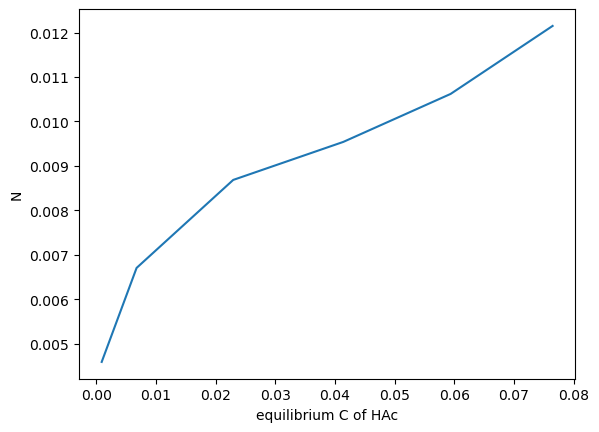

In [8]:
plt.plot(c_hac_equi, N)
plt.ylabel('N')
plt.xlabel('equilibrium C of HAc')
plt.show()

## 4. plotting C/N with respect to C

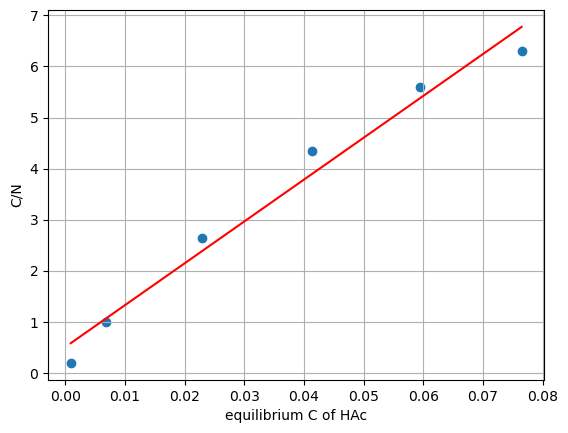

In [10]:
plt.scatter(c_hac_equi, cn)
plt.plot(c_hac_equi, np.poly1d(np.polyfit(c_hac_equi, cn, 1))(c_hac_equi), color= 'red')
plt.ylabel('C/N')
plt.xlabel('equilibrium C of HAc')
plt.grid()
plt.show()

In [11]:
slope = 81.9 # 1/Nm

In [12]:
# teta = Nm * N0 * sigma * pow(10, -20)

Nm = 1 / slope
N0 = 6022
sigma = 21 #A^2

teta = Nm * N0 * sigma
print(f'teta(active surface) = {teta}') #??

teta(active surface) = 1544.102564102564
